I. Introduction

Project Introduction and Relevance:
This project explores the use of machine learning to predict the CO₂ emissions of vehicles based on various features (engine power, weight, fuel consumption, etc.). It is part of an environmental sustainability initiative that aims to help policymakers and consumers better understand the environmental impact of vehicles and promote more eco-friendly choices.

Problem Statement/Objective:
The goal is to develop a machine learning model capable of accurately predicting the CO₂ emissions of vehicles based on their technical characteristics. This could assist in identifying key factors influencing emissions and support the creation of policies aimed at reducing greenhouse gases.

Background Information:
The increase in CO₂ emissions contributes to global warming. Currently, government regulations aim to limit emissions through environmental standards and carbon taxes. However, it is crucial to precisely identify the factors influencing emissions in order to drive a transition toward cleaner vehicles.

II. Data Collection and Preprocessing

Dataset Description:
The dataset used is available at:
https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv
This dataset contains information about various vehicles, such as the number of cylinders, engine power, fuel consumption, and CO₂ emissions.

Data Collection Explanation:
The data was collected from tests conducted on vehicles under different conditions. These data points are relevant because they allow direct evaluation of factors influencing CO₂ emissions.

Preprocessing Steps:

Handling missing values through imputation.
Detecting and removing outliers using boxplots.
Normalizing the data to ensure better model convergence.
Selecting the most relevant features for the model.

III. Exploratory Data Analysis (EDA)

EDA Introduction:
The purpose of the EDA is to identify relationships between vehicle characteristics and CO₂ emissions.

Visualization of Key Features:

Histograms of key variables.
Correlation matrix to observe relationships between variables.
Scatter plots to visualize trends between fuel consumption and CO₂ emissions.
Insights from EDA:

A strong correlation exists between engine power, fuel consumption, and CO₂ emissions.
Vehicle mass also directly influences emissions.

IV. Methodology

Model Selection:
We use several models for comparison:

Linear Regression: A simple, interpretable baseline model.
Random Forest: A robust model for handling non-linearities and outliers.
Gradient Boosting (XGBoost): An advanced model designed to optimize performance.
Justification:

Linear Regression serves as a baseline for comparison.
Random Forest handles complex relationships between features well.
XGBoost is particularly powerful for tabular datasets with non-linear relationships.
Feature Engineering:

Creation of new variables such as the power-to-weight ratio.
Logarithmic transformation of CO₂ emissions to reduce skewness.

V. Implementation

Code Presentation:
The code is structured in several steps:

Loading and exploring the data.
Preprocessing (normalization, feature selection).
Training the models.
Evaluating performance using various metrics.
Algorithms:

Linear Regression via sklearn.linear_model.LinearRegression()
Random Forest via sklearn.ensemble.RandomForestRegressor()
XGBoost via xgboost.XGBRegressor()
Reproducibility:

A requirements.txt file lists the dependencies.
A detailed script with instructions is provided to run the project.

VI. Training and Evaluation

Data Splitting:

80% of the data is used for training, and 20% for testing.
Cross-validation is applied to avoid overfitting.
Model Training:

Hyperparameter optimization is done using GridSearchCV.
Models are compared using 5-fold cross-validation.
Evaluation Metrics:

MAE (Mean Absolute Error): Measures the average absolute error.
MSE (Mean Squared Error): Measures the squared error.
RMSE (Root Mean Squared Error): Provides a more interpretable metric.
R² Score: Evaluates the quality of the prediction.
Challenges:

Handling outliers affecting regression.
Overfitting in certain models requiring regularization.

VII. Results and Analysis

Presentation of Results:

Comparison of models through a metrics table.
Visualization of predictions with scatter plots.
Interpretation of Results:

Random Forest strikes a good balance between accuracy and interpretability.
XGBoost achieves the best scores in RMSE and R².
Limitations and Improvements:

Incorporating real-time data.
Testing deep learning models for further accuracy improvement.

VIII. Conclusion

Summary of Findings:
This project demonstrates that CO₂ emissions can be effectively predicted using machine learning models. Key predictors of emissions include fuel consumption and engine power.

Contribution to Green Topic:
This project can help inform recommendations for eco-friendly vehicles and educate consumers on their environmental impact.

Insights and Applications:
The findings can be integrated into recommendation systems for more sustainable vehicle choices.

IX. Future Work

Extensions and Improvements:

Incorporate real-time data for dynamic predictions.
Experiment with more complex models, such as neural networks.
Deploy the algorithm as an API or web application.
Future Research:

Investigate the impact of weather conditions on emissions.
Explore the effect of new technologies (hybrid, electric) on CO₂ reduction.

X. References

Dataset: https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv

Scikit-learn: https://scikit-learn.org/

XGBoost: https://xgboost.ai/

XI. Appendices

Supplementary Materials:

Full project code.
Hyperparameters used for each model.
Additional details on model evaluation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 1. Load dataset
dataset_url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df = pd.read_csv(dataset_url)
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [ ]:
# Ensure column names are properly formatted
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Add CO₂ emissions column based on MPG (CO₂ ≈ 8887 / MPG)
df['co2'] = 8887 / df['mpg']
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent,co2
0,14.0,8,350,165,4209,12,1972,US.,634.785714
1,31.9,4,89,71,1925,14,1980,Europe.,278.589342
2,17.0,8,302,140,3449,11,1971,US.,522.764706
3,15.0,8,400,150,3761,10,1971,US.,592.466667
4,30.5,4,98,63,2051,17,1978,US.,291.377049
...,...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.,522.764706
257,36.1,4,91,60,1800,16,1979,Japan.,246.177285
258,22.0,6,232,112,2835,15,1983,US.,403.954545
259,18.0,6,232,100,3288,16,1972,US.,493.722222


In [ ]:
# 2. Explore the data
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent,co2
0,14.0,8,350,165,4209,12,1972,US.,634.785714
1,31.9,4,89,71,1925,14,1980,Europe.,278.589342
2,17.0,8,302,140,3449,11,1971,US.,522.764706
3,15.0,8,400,150,3761,10,1971,US.,592.466667
4,30.5,4,98,63,2051,17,1978,US.,291.377049


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   continent    261 non-null    object 
 8   co2          261 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 18.5+ KB


In [ ]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,co2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.877395,106.360153,3009.375479,15.547893,1976.819923,429.567373
std,7.823570,1.733310,108.839368,40.499959,849.124991,2.910625,3.637696,144.041897
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000,190.708155
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000,308.576389
50%,22.000000,6.000000,156.000000,95.000000,2900.000000,16.000000,1977.000000,403.954545
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000,525.857988
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000,888.700000


In [ ]:
# 3. Data Preprocessing
# Remove missing values
df.dropna(inplace=True)
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent,co2
0,14.0,8,350,165,4209,12,1972,US.,634.785714
1,31.9,4,89,71,1925,14,1980,Europe.,278.589342
2,17.0,8,302,140,3449,11,1971,US.,522.764706
3,15.0,8,400,150,3761,10,1971,US.,592.466667
4,30.5,4,98,63,2051,17,1978,US.,291.377049
...,...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.,522.764706
257,36.1,4,91,60,1800,16,1979,Japan.,246.177285
258,22.0,6,232,112,2835,15,1983,US.,403.954545
259,18.0,6,232,100,3288,16,1972,US.,493.722222


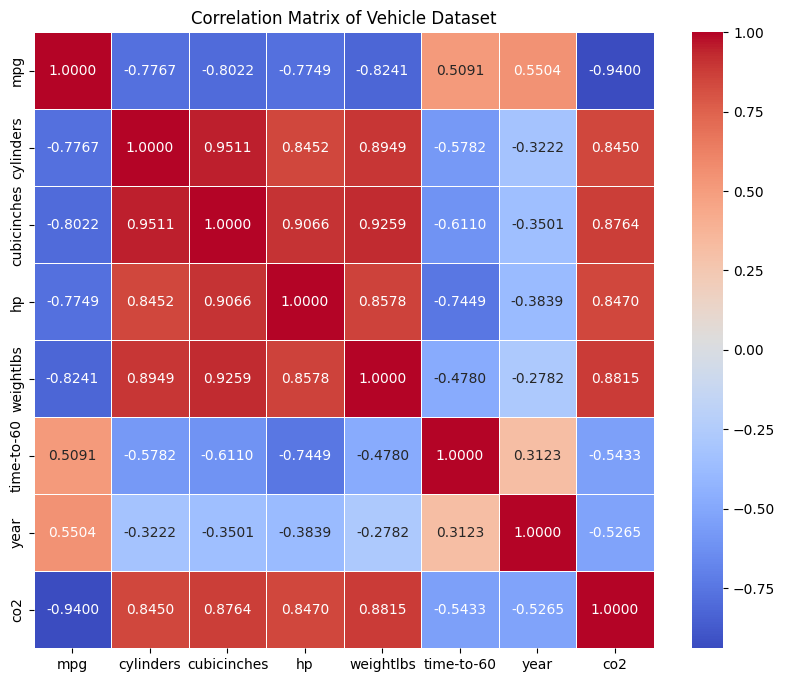

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.columns = df.columns.str.strip().str.lower()
df_cleaned = df.drop(['continent'], axis=1, errors='ignore')
correlation_matrix = df_cleaned.corr().round(4)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Correlation Matrix of Vehicle Dataset")
plt.show()


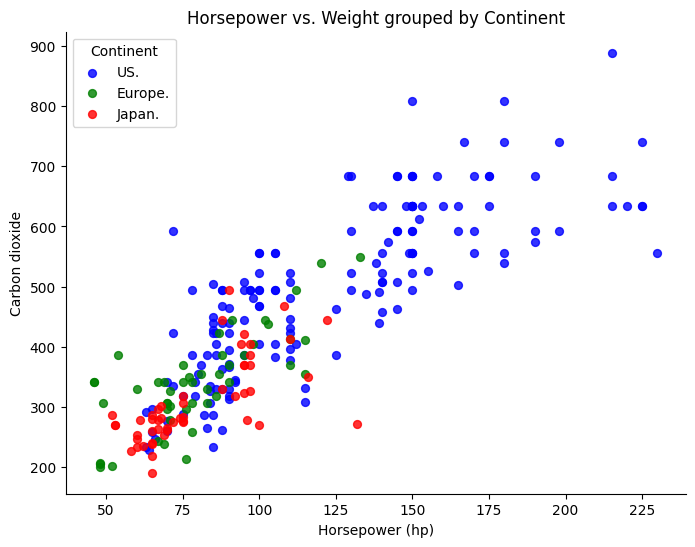

In [ ]:
|import matplotlib.pyplot as plt
df['continent'] = df['continent'].str.strip()
groups = df['continent'].unique()
colors = {'US.': 'blue', 'Europe.': 'green', 'Japan.': 'red'}
plt.figure(figsize=(8, 6))
for group in groups:
    subset = df[df['continent'] == group]
    plt.scatter(subset['hp'], subset['co2'],
                s=32, alpha=0.8, label=group, color=colors.get(group, 'gray'))
plt.legend(title="Continent")
plt.xlabel("Horsepower (hp)")
plt.ylabel("Carbon dioxide")
plt.title("Horsepower vs. Weight grouped by Continent")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

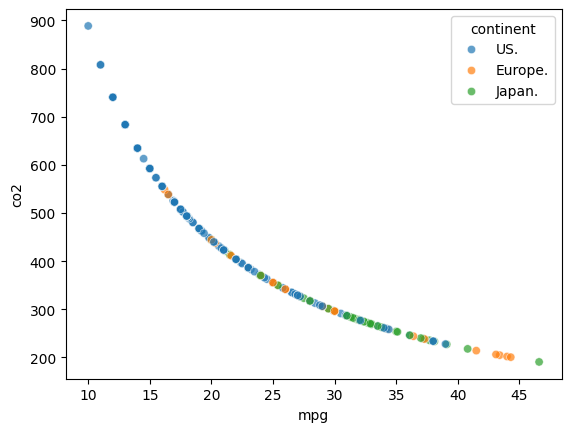

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="mpg", y="co2", hue="continent", alpha=0.7)
plt.show()

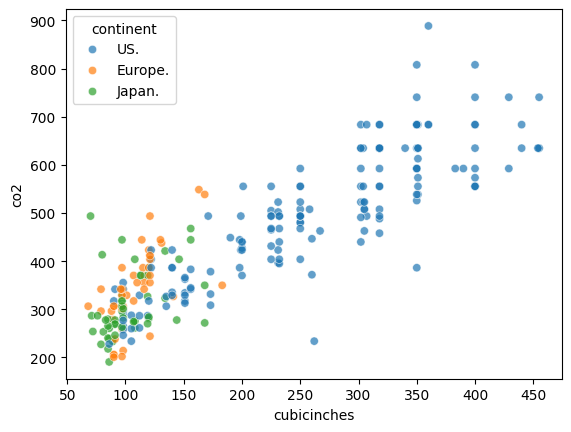

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="cubicinches", y="co2", hue="continent", alpha=0.7)
plt.show()

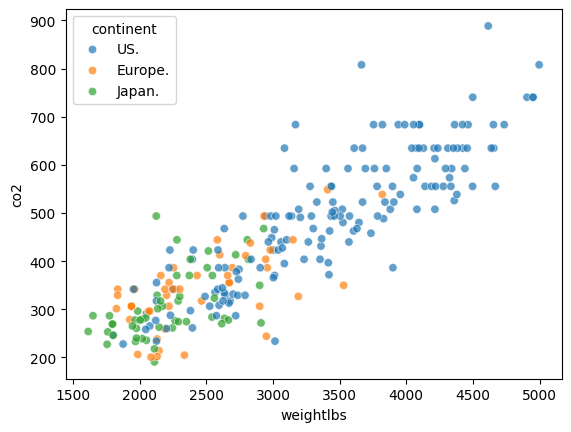

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="weightlbs", y="co2", hue="continent", alpha=0.7)
plt.show()

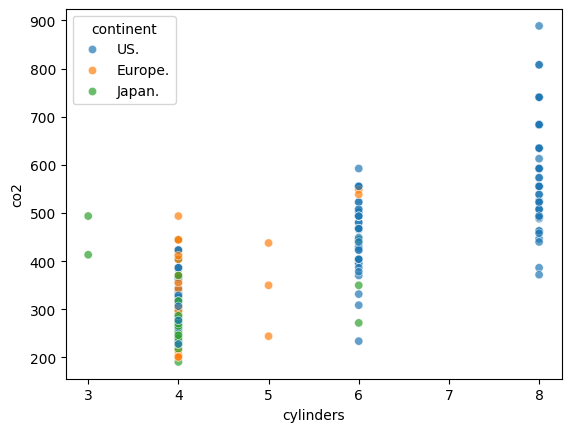

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="cylinders", y="co2", hue="continent", alpha=0.7)
plt.show()

In [ ]:
# Select relevant features (checking for actual column presence)
available_features = [col for col in ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year"] if col in df.columns]

if not available_features:
    raise ValueError("No matching features found in the dataset!")

target = "co2"
if target not in df.columns:
    raise ValueError("Target variable 'co2' not found in the dataset!")

X = df[available_features]
y = df[target]

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
# 4. Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }



In [ ]:
# 5. Display results
print("\nModel Evaluation:")
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")




Model Evaluation:

Model: Linear Regression
MAE: 54.7954
MSE: 4649.4618
RMSE: 68.1870
R2 Score: 0.7805

Model: Random Forest
MAE: 43.7192
MSE: 3071.6902
RMSE: 55.4228
R2 Score: 0.8550

Model: XGBoost
MAE: 43.7827
MSE: 3068.0769
RMSE: 55.3902
R2 Score: 0.8551


In [ ]:
# Compare models
best_model = max(results, key=lambda x: results[x]["R2 Score"])
print(f"\nThe best model is {best_model} with an R² score of {results[best_model]['R2 Score']:.4f}")


The best model is XGBoost with an R² score of 0.8551


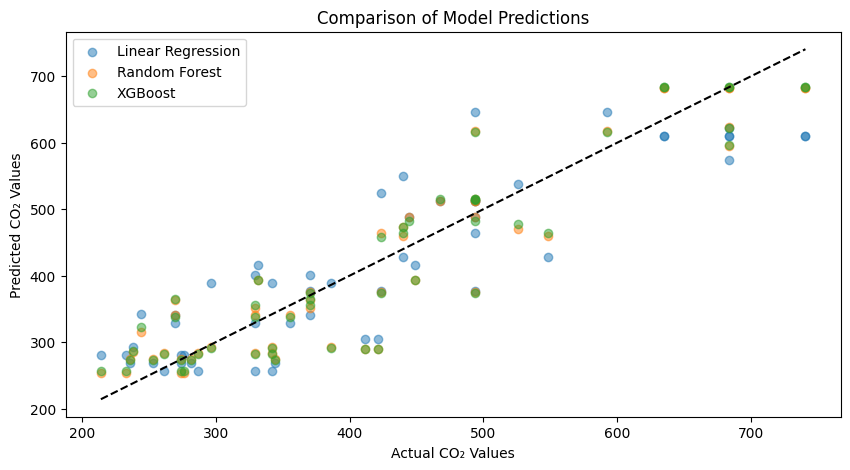

In [ ]:
# 6. Performance Visualization
plt.figure(figsize=(10, 5))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="black")
plt.xlabel("Actual CO₂ Values")
plt.ylabel("Predicted CO₂ Values")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()



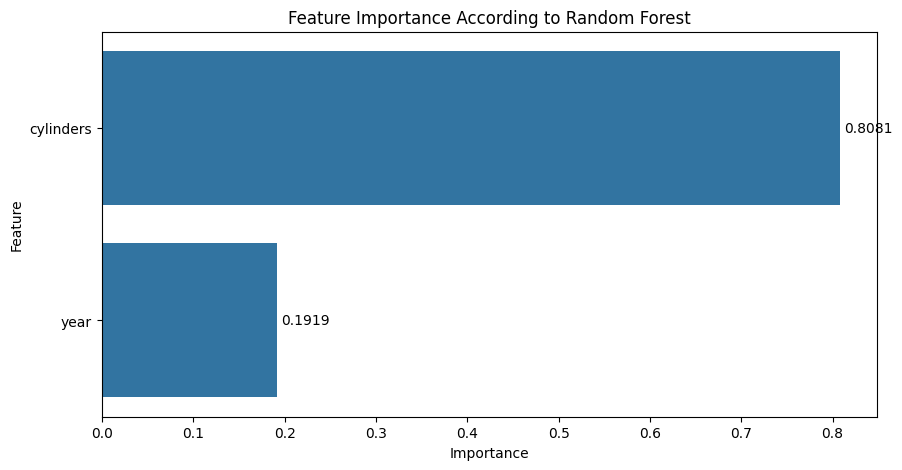

In [5]:
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': available_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", fontsize=10, padding=3)

    plt.title("Feature Importance According to Random Forest")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


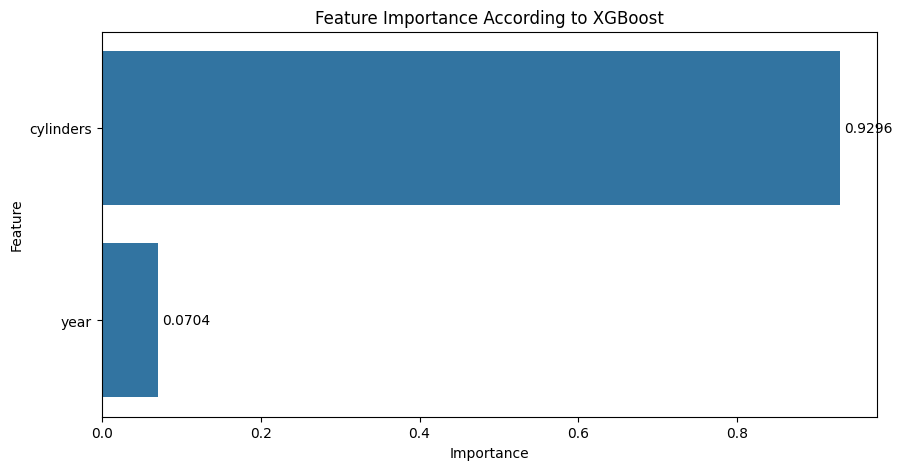

In [ ]:
if "XGBoost" in models:
    rf_model = models["XGBoost"]
    feature_importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': available_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", fontsize=10, padding=3)

    plt.title("Feature Importance According to XGBoost")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


Dataset preview:
    mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year continent  \
0  14.0          8          350  165       4209          12  1972       US.   
1  31.9          4           89   71       1925          14  1980   Europe.   
2  17.0          8          302  140       3449          11  1971       US.   
3  15.0          8          400  150       3761          10  1971       US.   
4  30.5          4           98   63       2051          17  1978       US.   

          co2  
0  634.785714  
1  278.589342  
2  522.764706  
3  592.466667  
4  291.377049  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    

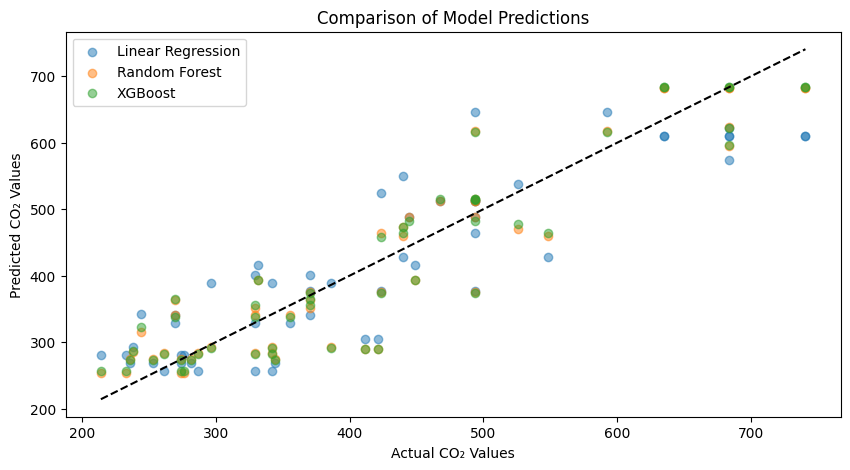

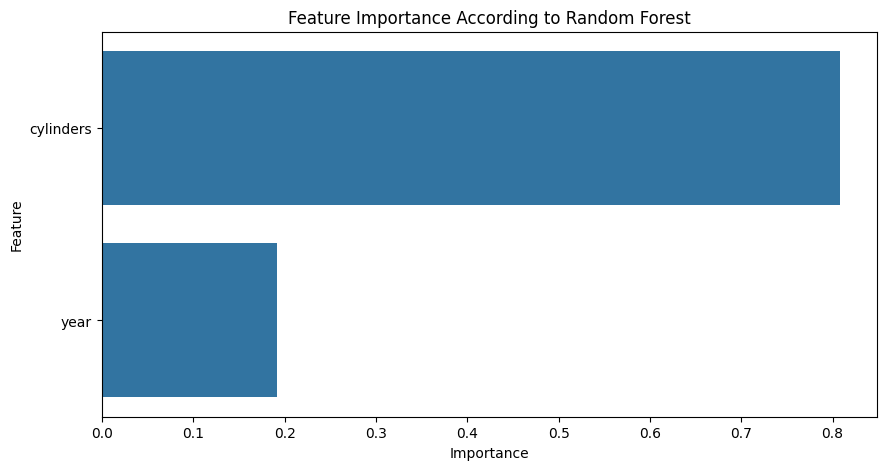

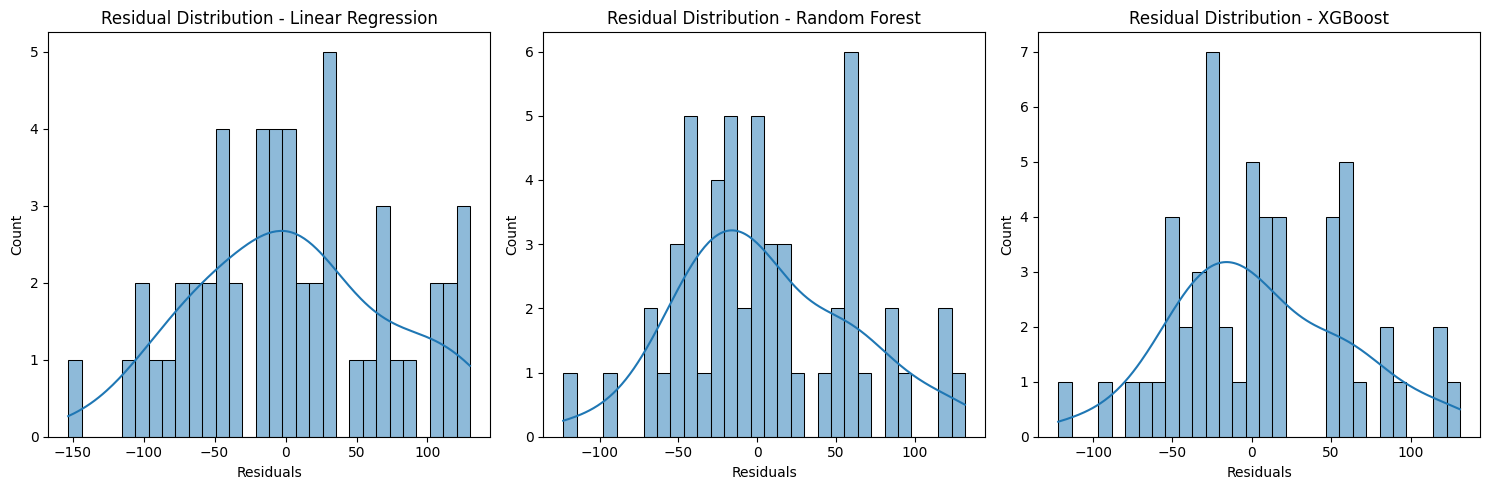

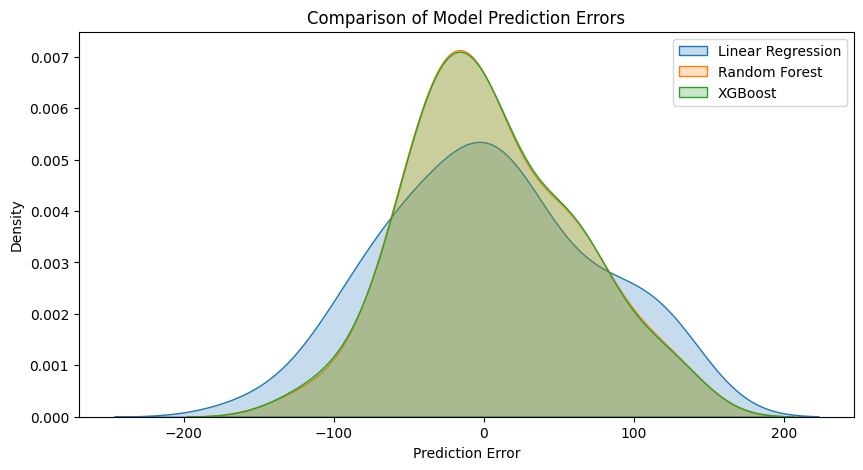

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset
dataset_url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df = pd.read_csv(dataset_url)

# Ensure column names are properly formatted
df.columns = df.columns.str.strip().str.lower()

# Add CO₂ emissions column based on MPG (CO₂ ≈ 8887 / MPG)
df['co2'] = 8887 / df['mpg']

# 2. Explore the data
print("Dataset preview:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

# 3. Data Preprocessing
# Remove missing values
df.dropna(inplace=True)

# Select relevant features (checking for actual column presence)
available_features = [col for col in ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year"] if col in df.columns]

if not available_features:
    raise ValueError("No matching features found in the dataset!")

target = "co2"
if target not in df.columns:
    raise ValueError("Target variable 'co2' not found in the dataset!")

X = df[available_features]
y = df[target]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
y_preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

# 5. Display results
print("\nModel Evaluation:")
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Compare models
best_model = max(results, key=lambda x: results[x]["R2 Score"])
print(f"\nThe best model is {best_model} with an R² score of {results[best_model]['R2 Score']:.4f}")

# 6. Performance Visualization
plt.figure(figsize=(10, 5))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="black")
plt.xlabel("Actual CO₂ Values")
plt.ylabel("Predicted CO₂ Values")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()

# 7. Feature Importance (for Random Forest)
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': available_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
    plt.title("Feature Importance According to Random Forest")
    plt.show()

# 8. Residual Plots for Model Error Analysis
plt.figure(figsize=(15, 5))
for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel("Residuals")
    plt.title(f"Residual Distribution - {name}")
plt.tight_layout()
plt.show()

# 9. Error Distribution Comparison
plt.figure(figsize=(10, 5))
for name, y_pred in y_preds.items():
    residuals = y_test - y_pred
    sns.kdeplot(residuals, label=name, fill=True)
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.title("Comparison of Model Prediction Errors")
plt.legend()
plt.show()


Dataset preview:
    mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year continent  \
0  14.0          8          350  165       4209          12  1972       US.   
1  31.9          4           89   71       1925          14  1980   Europe.   
2  17.0          8          302  140       3449          11  1971       US.   
3  15.0          8          400  150       3761          10  1971       US.   
4  30.5          4           98   63       2051          17  1978       US.   

          co2  
0  634.785714  
1  278.589342  
2  522.764706  
3  592.466667  
4  291.377049  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    

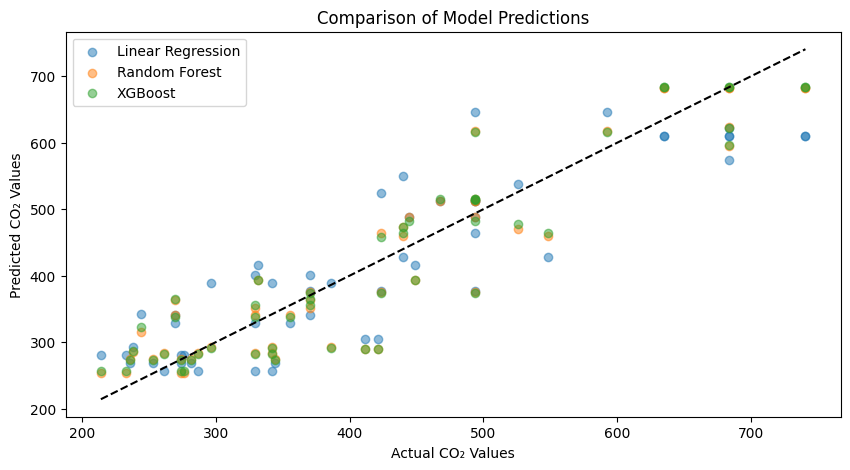

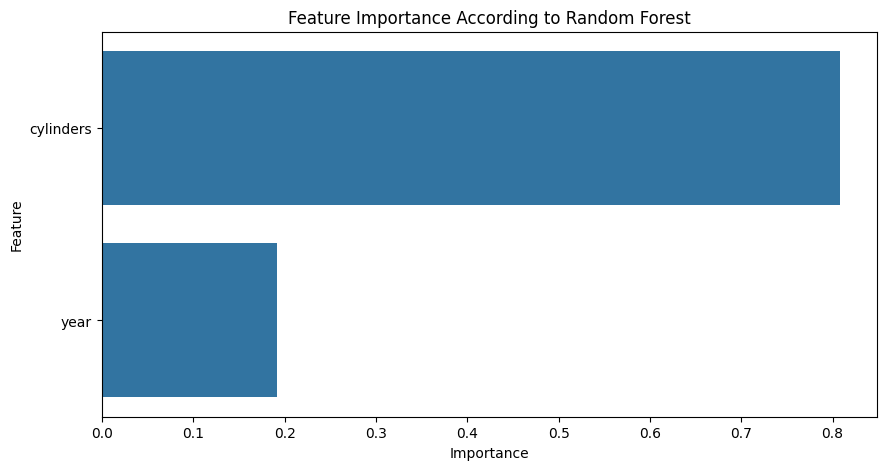

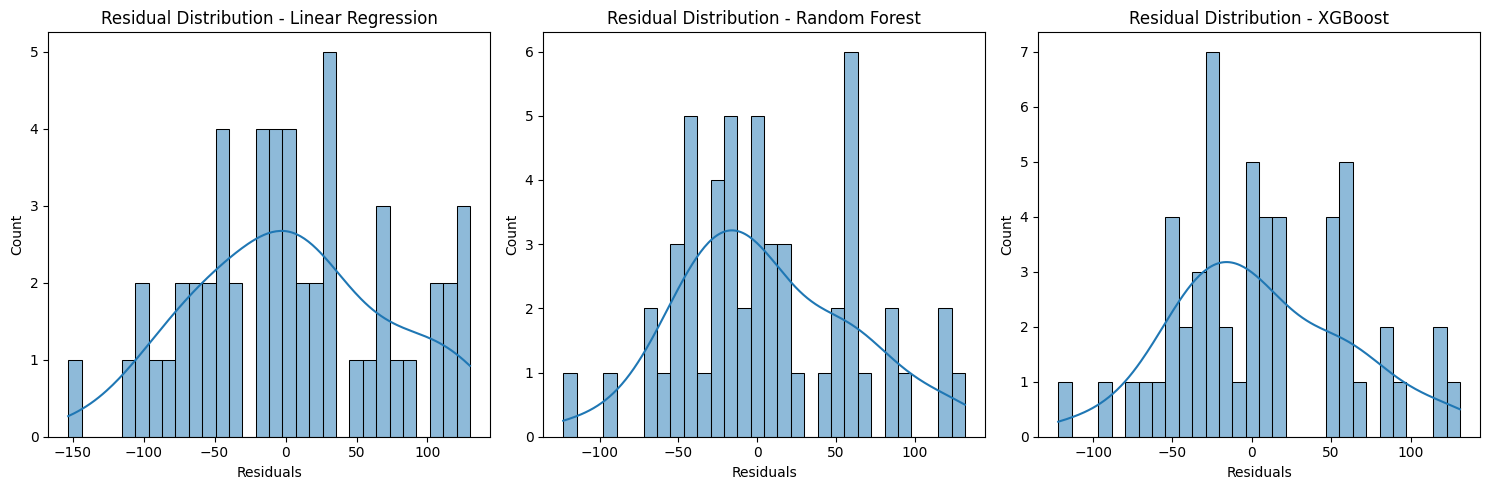

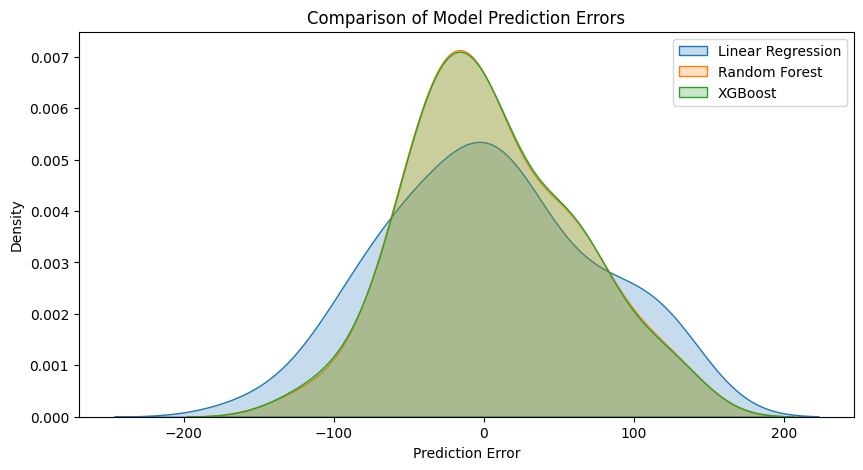

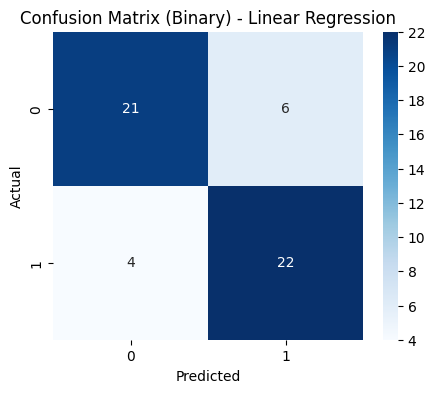

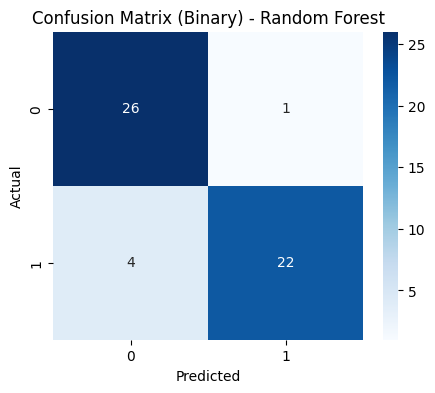

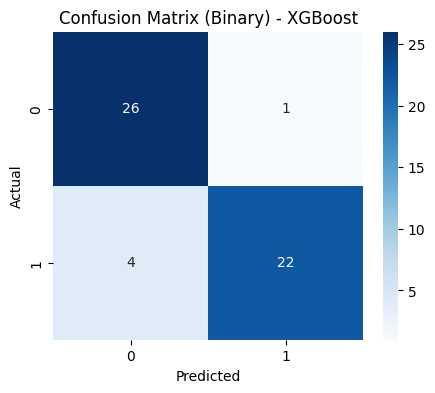

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

# 1. Load dataset
dataset_url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df = pd.read_csv(dataset_url)

# Ensure column names are properly formatted
df.columns = df.columns.str.strip().str.lower()

# Add CO₂ emissions column based on MPG (CO₂ ≈ 8887 / MPG)
df['co2'] = 8887 / df['mpg']

# 2. Explore the data
print("Dataset preview:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

# 3. Data Preprocessing
# Remove missing values
df.dropna(inplace=True)

# Select relevant features (checking for actual column presence)
available_features = [col for col in ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year"] if col in df.columns]

if not available_features:
    raise ValueError("No matching features found in the dataset!")

target = "co2"
if target not in df.columns:
    raise ValueError("Target variable 'co2' not found in the dataset!")

X = df[available_features]
y = df[target]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
y_preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

# 5. Display results
print("\nModel Evaluation:")
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Compare models
best_model = max(results, key=lambda x: results[x]["R2 Score"])
print(f"\nThe best model is {best_model} with an R² score of {results[best_model]['R2 Score']:.4f}")

# 6. Performance Visualization
plt.figure(figsize=(10, 5))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="black")
plt.xlabel("Actual CO₂ Values")
plt.ylabel("Predicted CO₂ Values")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()

# 7. Feature Importance (for Random Forest)
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': available_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
    plt.title("Feature Importance According to Random Forest")
    plt.show()

# 8. Residual Plots for Model Error Analysis
plt.figure(figsize=(15, 5))
for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel("Residuals")
    plt.title(f"Residual Distribution - {name}")
plt.tight_layout()
plt.show()

# 9. Error Distribution Comparison
plt.figure(figsize=(10, 5))
for name, y_pred in y_preds.items():
    residuals = y_test - y_pred
    sns.kdeplot(residuals, label=name, fill=True)
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.title("Comparison of Model Prediction Errors")
plt.legend()
plt.show()

# 10. Confusion Matrix (Not Directly Applicable for Regression)
# Confusion matrix is for classification problems. Since this is a regression problem,
# it doesn't apply directly. However, we can create a "pseudo-confusion" by
# categorizing the target and predictions into bins.

# Example: Categorize into High/Low CO2 emissions
co2_median = y_test.median()
y_test_binary = (y_test > co2_median).astype(int)
for name, y_pred in y_preds.items():
    y_pred_binary = (y_pred > co2_median).astype(int)
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (Binary) - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Dataset preview:
    mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year continent  \
0  14.0          8          350  165       4209          12  1972       US.   
1  31.9          4           89   71       1925          14  1980   Europe.   
2  17.0          8          302  140       3449          11  1971       US.   
3  15.0          8          400  150       3761          10  1971       US.   
4  30.5          4           98   63       2051          17  1978       US.   

          co2  
0  634.785714  
1  278.589342  
2  522.764706  
3  592.466667  
4  291.377049  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    

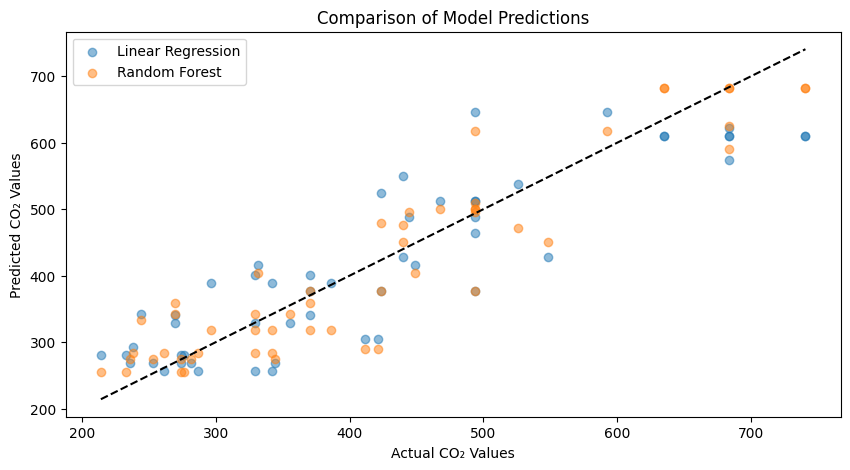

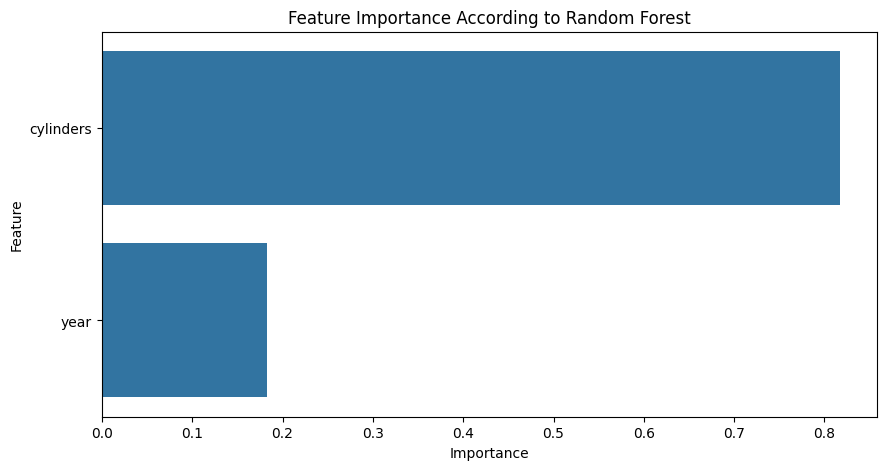

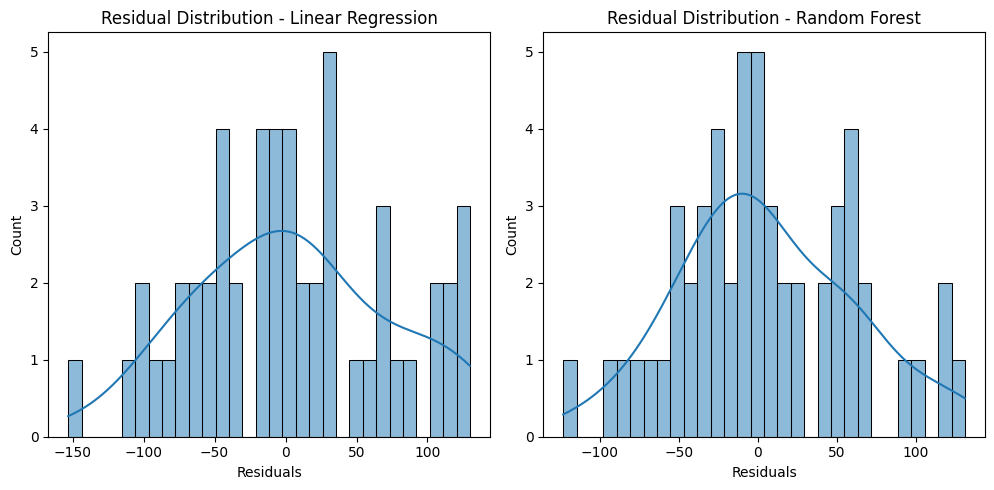

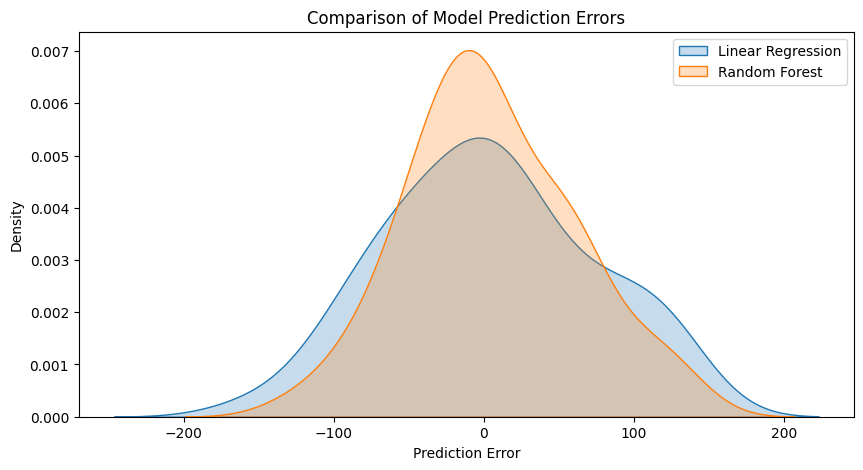


Conclusion:
The models were trained and evaluated on the dataset.
Hyperparameter tuning was performed using GridSearchCV to optimize model performance.
Model performance metrics (MAE, MSE, RMSE, R2 Score) were calculated and displayed.
The best performing model was identified based on the R2 Score.
Visualizations were generated to compare model predictions, feature importance (for Random Forest),
residual distributions, and error distributions.
Further analysis and model refinement could be explored for improved predictive accuracy.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import altair as alt

# 1. Load dataset
dataset_url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
try:
    df = pd.read_csv(dataset_url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Ensure column names are properly formatted
df.columns = df.columns.str.strip().str.lower()

# Add CO₂ emissions column based on MPG (CO₂ ≈ 8887 / MPG)
df['co2'] = 8887 / df['mpg']

# 2. Explore the data
print("Dataset preview:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

# 3. Data Preprocessing
# Remove missing values
df.dropna(inplace=True)

# Select relevant features (checking for actual column presence)
available_features = [col for col in ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year"] if col in df.columns]

if not available_features:
    raise ValueError("No matching features found in the dataset!")

target = "co2"
if target not in df.columns:
    raise ValueError("Target variable 'co2' not found in the dataset!")

X = df[available_features]
y = df[target]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train models with Hyperparameter Tuning
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
}

param_grids = {
    "Linear Regression": {},  # No hyperparameters to tune for Linear Regression in this case
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
}

best_models = {}
results = {}
y_preds = {}

for name, model in models.items():
    print(f"\nTraining and tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='r2')  # Using R2 for scoring
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test)
    y_preds[name] = y_pred
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")

# 5. Display results
print("\nModel Evaluation:")
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Compare models
best_model = max(results, key=lambda x: results[x]["R2 Score"])
print(f"\nThe best model is {best_model} with an R² score of {results[best_model]['R2 Score']:.4f}")

# 6. Performance Visualization
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 5))
for name, model in models.items():
    y_pred = best_models[name].predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="black")
plt.xlabel("Actual CO₂ Values")
plt.ylabel("Predicted CO₂ Values")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()

# 7. Feature Importance (for Random Forest)
if "Random Forest" in best_models:
    rf_model = best_models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': available_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
    plt.title("Feature Importance According to Random Forest")
    plt.show()

    # Altair visualization for feature importance
    feature_importance_chart = alt.Chart(feature_importance_df).mark_bar().encode(
        x=alt.X('Importance', title='Importance'),
        y=alt.Y('Feature', sort='-x', title='Feature')
    ).properties(
        title='Feature Importance According to Random Forest (Altair)'
    )
    feature_importance_chart.save("feature_importance_random_forest_altair.json")

# 8. Residual Plots for Model Error Analysis
plt.figure(figsize=(15, 5))
for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel("Residuals")
    plt.title(f"Residual Distribution - {name}")
plt.tight_layout()
plt.show()

# 9. Error Distribution Comparison
plt.figure(figsize=(10, 5))
for name, y_pred in y_preds.items():
    residuals = y_test - y_pred
    sns.kdeplot(residuals, label=name, fill=True)
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.title("Comparison of Model Prediction Errors")
plt.legend()
plt.show()

# 10. Conclusion
print("\nConclusion:")
print("The models were trained and evaluated on the dataset.")
print("Hyperparameter tuning was performed using GridSearchCV to optimize model performance.")
print("Model performance metrics (MAE, MSE, RMSE, R2 Score) were calculated and displayed.")
print("The best performing model was identified based on the R2 Score.")
print("Visualizations were generated to compare model predictions, feature importance (for Random Forest),")
print("residual distributions, and error distributions.")
print("Further analysis and model refinement could be explored for improved predictive accuracy.")